# **Analyse des Prix des Diamants avec l'Analyse en Composantes Principales (ACP)**

# **Introduction**

Dans cette analyse, nous étudions un jeu de données contenant des informations sur plus de 50 000 diamants ronds. Ce dataset comprend diverses caractéristiques physiques des diamants ainsi que leur prix. L'objectif est d'examiner la relation entre ces caractéristiques et le prix des diamants en utilisant l'Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité et mieux visualiser les tendances.

# **Description du jeu de données**

Le dataset contient les variables suivantes :
carat : Poids du diamant en carats, influençant directement son prix.
cut : Qualité de la coupe du diamant, affectant sa brillance.
color : Couleur du diamant, notée de "D" (incolore) à "J" (jaune pâle).
clarity : Pureté du diamant, mesurée par la présence d'inclusions.
depth : Proportion de la profondeur du diamant par rapport à son diamètre.
table : Taille de la surface plane du diamant, influençant la brillance.
price : Prix du diamant en dollars.
x, y, z : Dimensions du diamant (longueur, largeur, profondeur).

## **Problématique :**
Quels sont les facteurs influençant le prix des diamants ?

# **Objectifs de l'analyse**

Explorer les relations entre les variables : Examiner comment les caractéristiques influencent le prix du diamant.

Effectuer une ACP : Réduire la dimensionnalité du jeu de données tout en conservant l'essentiel de l'information.

Visualiser les résultats : Utiliser des graphiques pour interpréter les composantes principales et observer les tendances.

Étapes de l'analyse

- Prétraitement des données

- Exploration des données

- Analyse des variables catégoriques

- Application de l'ACP

- Visualisation et interprétation des résultats


4Cs-Diamond-Shape.svg

# **Configuration de l'environnement**

In [ ]:
# Installer les packages nécessaires (décommentez si besoin)
install.packages(c("tidyverse", "ggplot2", "dplyr", "FactoMineR", "factoextra", "promises"))

# Charger les bibliothèques
library(tidyverse)
library(ggplot2)
library(dplyr)
library(FactoMineR)
library(factoextra)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **Chargement des données**

In [ ]:
data(diamonds)

In [ ]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [ ]:
# Summary statistics
summary(diamonds)


     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

Le résumé statistique montre que la majorité des diamants pèsent entre **0.4 et 1.04 carats**, avec des prix médian de **2 401 USD** et moyen de **3 933 USD**, suggérant des valeurs extrêmes. Les dimensions (x, y, z) sont fortement corrélées au poids. La coupe *Ideal* est la plus courante, la couleur *G* est prédominante et la pureté *SI1* est la plus fréquente. Les variables *depth* et *table* restent autour de valeurs standards. Une ACP aidera à mieux comprendre ces relations.

In [ ]:

# Structure of the dataset
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


# Exploration des données

In [ ]:
sum(is.na(diamonds))

[1] 0

Aucun valeur manquante n'est présente dans le dataset

# Élimination des valeurs aberrantes

In [ ]:
# Résumé statistique pour chaque colonne
summary(diamonds$x)
summary(diamonds$y)
summary(diamonds$z)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.710   5.700   5.731   6.540  10.740 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.720   5.710   5.735   6.540  58.900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.910   3.530   3.539   4.040  31.800 

In [ ]:
# Définir une fonction pour détecter les outliers selon la méthode IQR
find_outliers <- function(column) {
  Q1 <- quantile(column, 0.25)
  Q3 <- quantile(column, 0.75)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  return(column[column < lower_bound | column > upper_bound])
}

# Appliquer la fonction aux colonnes x, y, z
outliers_x <- find_outliers(diamonds$x)
outliers_y <- find_outliers(diamonds$y)
outliers_z <- find_outliers(diamonds$z)

# Afficher les outliers pour chaque variable
outliers_x
outliers_y
outliers_z


[1]  0.00  0.00  0.00  9.54  9.38  9.53  9.44  9.49  9.65  0.00  9.42  9.44
[13]  9.32 10.14 10.02  0.00  9.42 10.01  9.86  9.30 10.00 10.74  0.00  9.36
[25] 10.23  9.51  9.44  9.66  9.35  9.41  0.00  0.00

[1]  0.00  0.00  9.38  9.31  9.48 58.90  9.40  9.42  9.59  0.00  9.37 10.10
[13]  9.94  0.00  9.34  9.94  9.81  9.85 10.54  0.00  9.31 10.16  9.46  9.38
[25]  9.63  9.32 31.80  0.00  0.00

[1]  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.07  0.00  5.77  5.76
[13]  5.97  5.98  5.91  5.79  6.38  8.06  5.85  5.92  6.03  0.00  0.00  6.17
[25]  6.24  5.75  0.00  6.16  0.00  6.27  6.31  6.13  5.86  0.00  6.43  6.98
[37]  0.00  0.00  5.90  5.90  5.77  5.77  6.72  6.03  0.00 31.80  0.00  0.00
[49]  0.00

In [ ]:
# Filtrer les valeurs aberrantes
diamonds <- diamonds %>% filter(x > 0, y > 0, z > 0)


In [ ]:
# Fonction pour détecter et exclure les outliers avec l'IQR
filter_outliers <- function(df, column) {
  Q1 <- quantile(df[[column]], 0.25)
  Q3 <- quantile(df[[column]], 0.75)
  IQR_value <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR_value
  upper_bound <- Q3 + 1.5 * IQR_value

  # Filtrer les outliers
  df <- df %>% filter(df[[column]] >= lower_bound & df[[column]] <= upper_bound)
  return(df)
}

# Appliquer le filtrage sur x, y, z
diamonds <- filter_outliers(diamonds, "x")
diamonds <- filter_outliers(diamonds, "y")
diamonds <- filter_outliers(diamonds, "z")


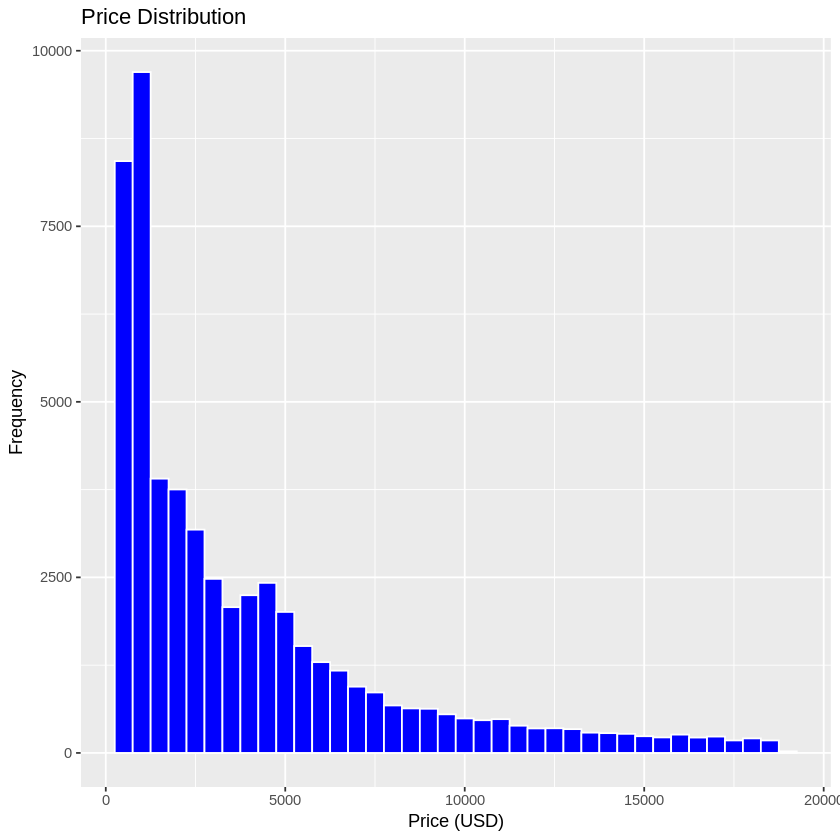

In [ ]:
ggplot(diamonds, aes(x = price)) +
  geom_histogram(binwidth = 500, fill = "blue", color = "white") +
  labs(title = "Price Distribution", x = "Price (USD)", y = "Frequency")


*La distribution des prix des diamants montre une tendance décroissante à mesure que le prix augmente*. La majorité des diamants se situent autour de 1000 USD, ce qui correspond à la plage de prix la plus fréquente. Cela révèle une concentration des prix dans une gamme modérée. En revanche, au-delà de 12 500 USD, les occurrences deviennent beaucoup plus rares, suggérant que les diamants les plus onéreux sont moins courants et appartiennent probablement à des catégories plus exclusives ou de très haute qualité.


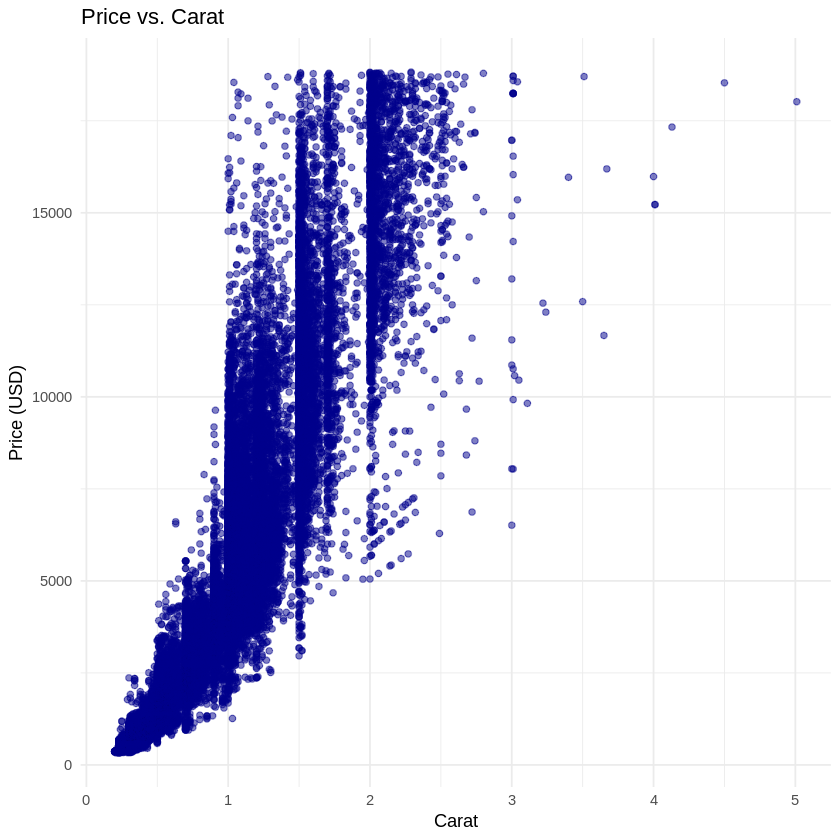

In [ ]:
ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point(alpha = 0.5, color = "darkblue") +
  labs(title = "Price vs. Carat", x = "Carat", y = "Price (USD)") +
  theme_minimal()


Ce graphique met en évidence la relation entre le prix et le poids en carats des diamants. Une tendance générale se dégage : **le prix augmente avec le poids en carats**. Cependant, pour les diamants pesant moins de 1.0 carat, une forte variabilité des prix est observée, probablement en raison de l’influence d’autres facteurs tels que **la qualité de la coupe, la clarté** ou **la couleur**, qui jouent un rôle clé dans l’évaluation des diamants. Par ailleurs, les bandes verticales correspondent à des poids standards (0.5, 1.0, 1.5 carats), souvent utilisés comme références dans l’industrie des diamants.



# Analyze Relationships

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



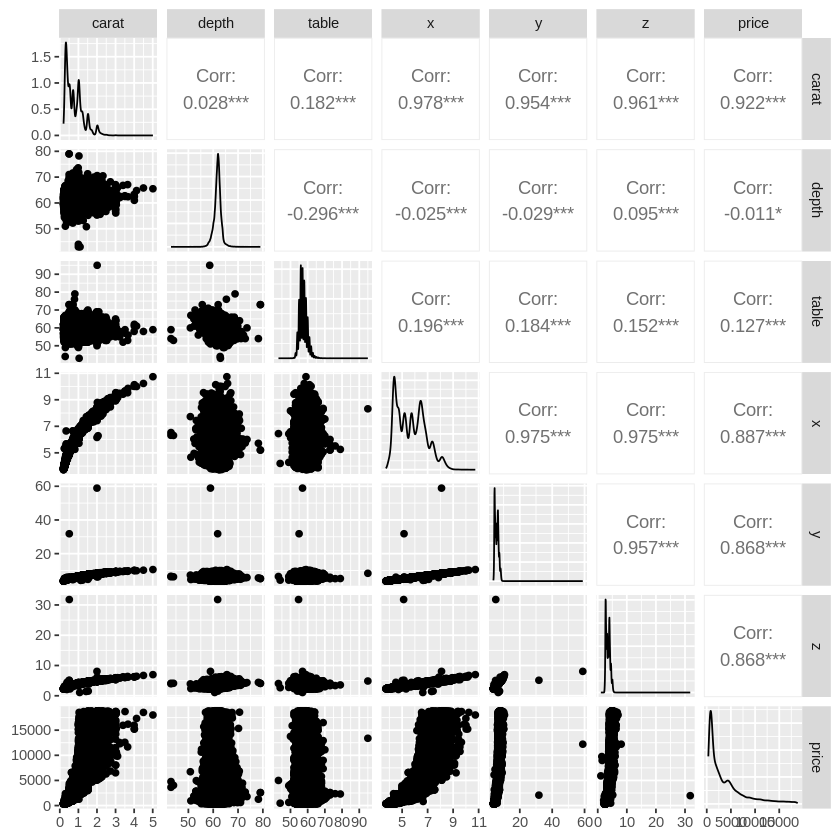

In [ ]:
# Installez GGally si nécessaire
install.packages("GGally")
library(GGally)
# Crée un graphique de pairwise scatter plots
ggpairs(diamonds %>% select(carat, depth, table, x, y, z, price))


Cette figure met en évidence une forte corrélation positive entre le poids en carats des diamants et leurs dimensions physiques (x, y, z). Par ailleurs, une forte corrélation est également observée entre le poids en carats et le prix des diamants. Ces observations suggèrent que les dimensions physiques et le poids sont des facteurs majeurs influençant le prix. Afin de mieux comprendre et visualiser les relations complexes entre ces variables numériques fortement corrélées, une analyse en composantes

# Analyse des variables catégoriques

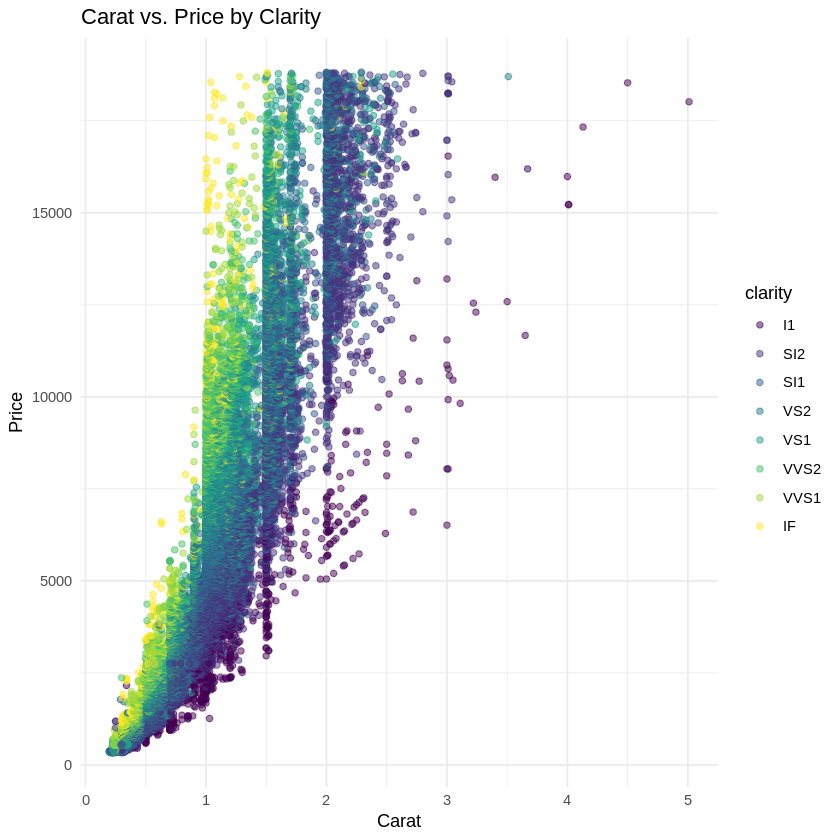

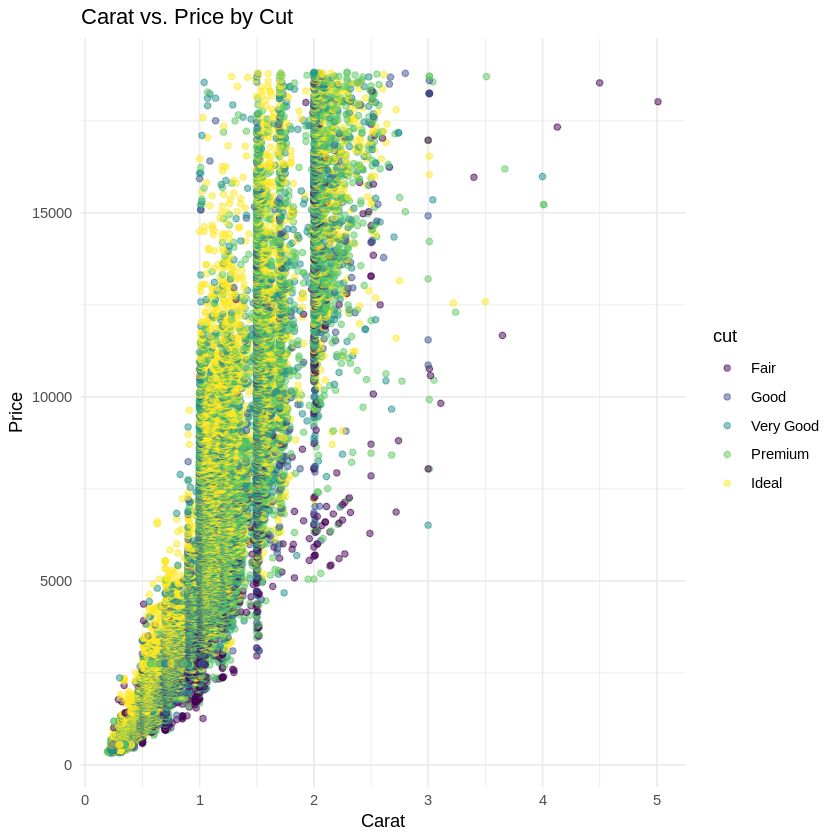

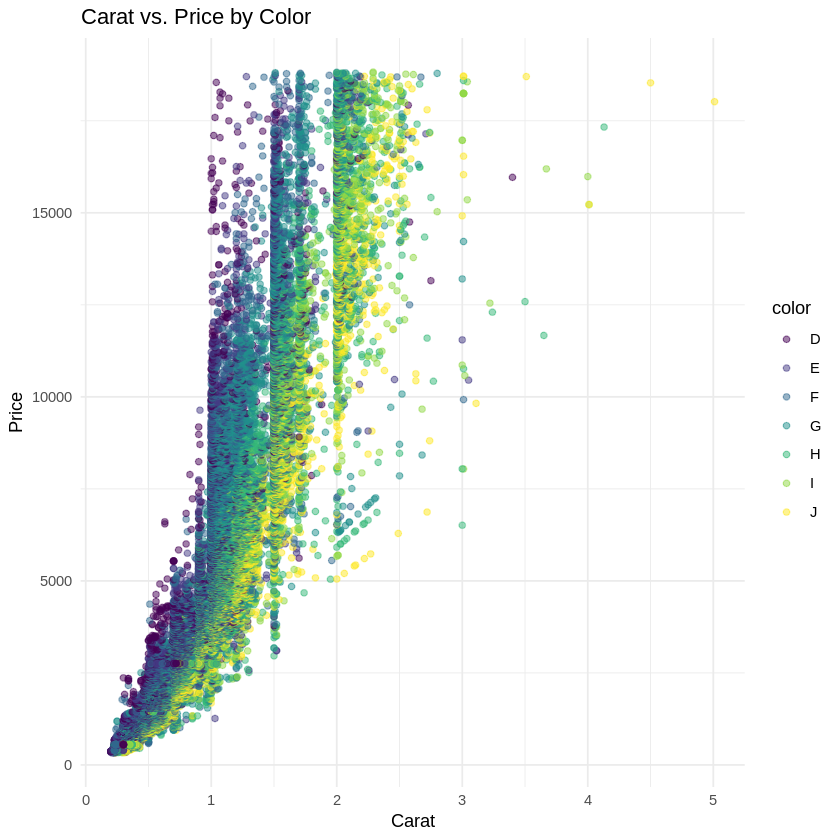

In [ ]:
# Scatterplot of carat vs. price, colored by clarity
ggplot(diamonds, aes(x = carat, y = price, color = clarity)) +
  geom_point(alpha = 0.5) +
  labs(title = "Carat vs. Price by Clarity", x = "Carat", y = "Price") +
  theme_minimal()

# Scatterplot of carat vs. price, colored by cut
ggplot(diamonds, aes(x = carat, y = price, color = cut)) +
  geom_point(alpha = 0.5) +
  labs(title = "Carat vs. Price by Cut", x = "Carat", y = "Price") +
  theme_minimal()

# Scatterplot of carat vs. price, colored by color
ggplot(diamonds, aes(x = carat, y = price, color = color)) +
  geom_point(alpha = 0.5) +
  labs(title = "Carat vs. Price by Color", x = "Carat", y = "Price") +
  theme_minimal()


Ces trois graphiques de dispersion en croisant le carat avec les variables qualitatives cut, clarity et color. Lorsqu'elles étaient analysées de manière isolée, ces variables qualitatives ne permettaient pas d'obtenir des résultats cohérents. Cependant, en intégrant le carat, les relations entre ces variables et le prix des diamants sont devenues plus intelligibles. Cela démontre que le prix d'un diamant est influencé par plusieurs caractéristiques, et que l'ajout du carat améliore la compréhension de ces interactions.


# **Application de l'ACP**

In [ ]:

# Prepare the data (select numeric columns)
numeric_data <- diamonds %>%
  select(carat, depth, table, price, x, y, z)

# Perform PCA using FactoMineR
pca_result <- PCA(numeric_data, scale.unit = TRUE, graph = TRUE)

# View the eigenvalues (explained variance by each principal component)
print(pca_result$eig)

# Summary of PCA results
summary(pca_result)

# Plot the individuals (data points) in the PCA space
plot.PCA(pca_result, choix = "ind", main = "PCA of Diamonds Dataset (Individuals)")

# Plot the variables (features) in the PCA space
plot.PCA(pca_result, choix = "var", main = "PCA of Diamonds Dataset (Variables)")


        eigenvalue percentage of variance cumulative percentage of variance
comp 1 4.838900458            69.12714940                          69.12715
comp 2 1.285230594            18.36043706                          87.48759
comp 3 0.691179714             9.87399592                          97.36158
comp 4 0.162405164             2.32007376                          99.68166
comp 5 0.019721225             0.28173179                          99.96339
comp 6 0.001315950             0.01879928                          99.98219
comp 7 0.001246895             0.01781279                         100.00000

Call:
PCA(X = numeric_data, scale.unit = TRUE, graph = TRUE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               4.839   1.285   0.691   0.162   0.020   0.001   0.001
% of var.             69.127  18.360   9.874   2.320   0.282   0.019   0.018
Cumulative % of var.  69.127  87.488  97.362  99.682  99.963  99.982 100.000

Indivi

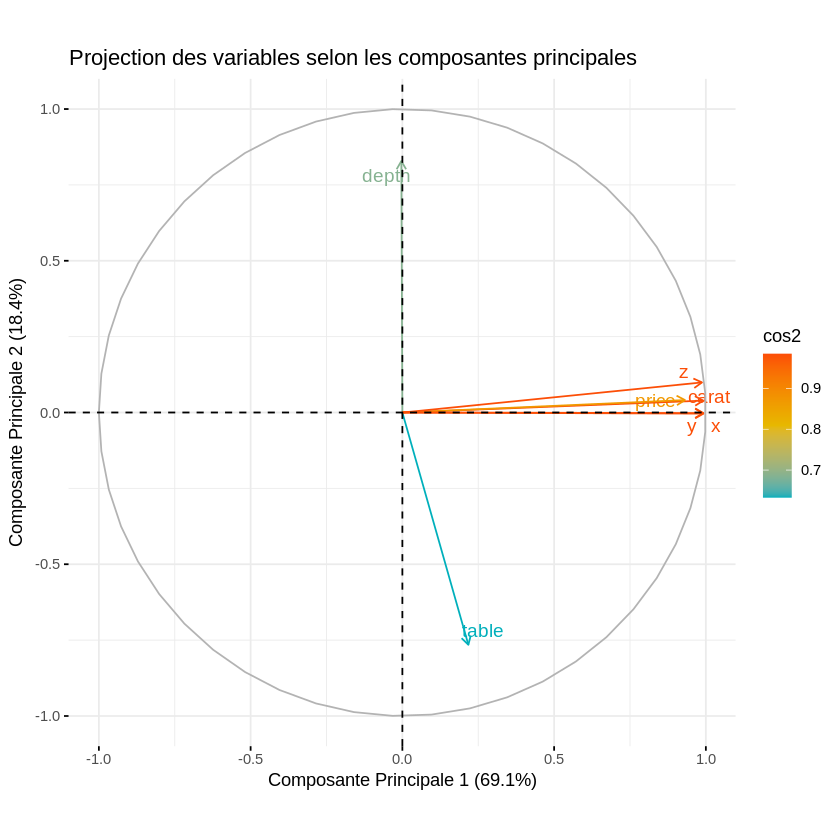

In [ ]:
# Get explained variance from PCA result
pc1_variance <- round(pca_result$eig[1, 2], 1)  # Percentage for PC1
pc2_variance <- round(pca_result$eig[2, 2], 1)  # Percentage for PC2

# Visualisation des relations entre les variables (Biplot)
fviz_pca_var(pca_result, col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE) +
  labs(title = "Projection des variables selon les composantes principales",
       x = paste("Composante Principale 1 (", pc1_variance, "%)", sep = ""),
       y = paste("Composante Principale 2 (", pc2_variance, "%)", sep = ""))


Le cercle des corrélations présente la projection des variables sur les deux premières composantes principales. Ce graphique met en évidence comment chaque variable est positionnée selon les axes principaux de la variance. Par exemple, on observe que  **les variables  carat, price, x, y  et z sont fortement corrélées et proches l'une de l'autre surl’axe de la première composante principale (69.1%)**, indiquant qu'elles expliquent une proportion importante de la variance des données. **En revanche, table et depth, bien que moins corrélées entre elles et éloignées de cet axe, contribuent davantage à la deuxième composante principale ( 18,4 %)**. De plus, ces deux variables présentent une corrélation négative, signalant une relation inverse dans leur influence sur les composantes principales.


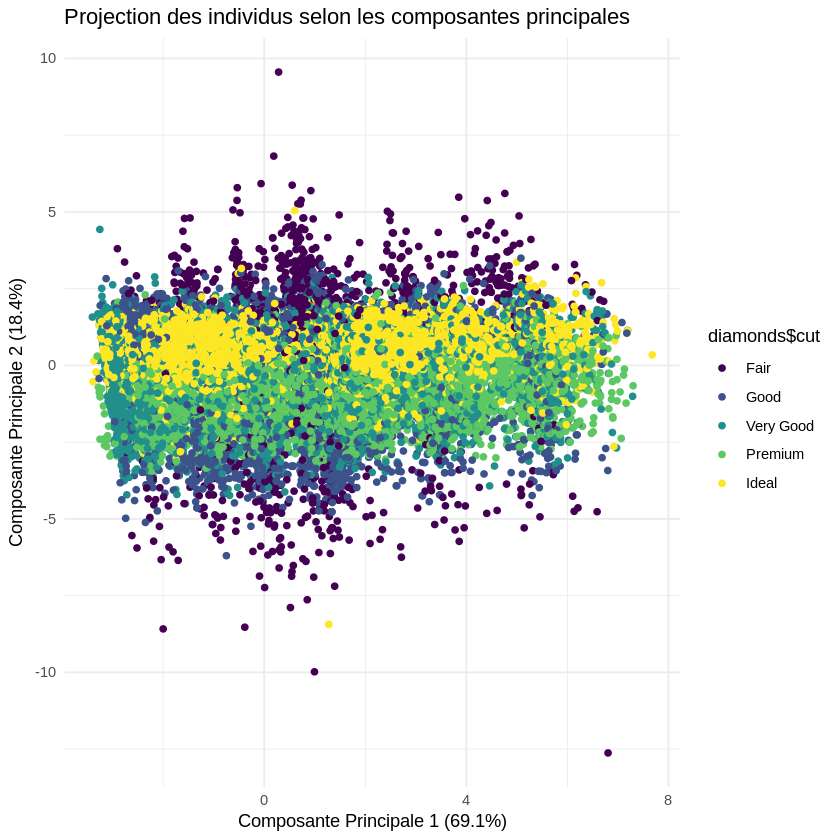

In [ ]:
# Extract the PCA scores (coordinates of individuals in the principal component space)
pca_df <- as.data.frame(pca_result$ind$coord)
# Extract the explained variance for each principal component
explained_variance <- pca_result$eig[, 2]  # Percentage of variance explained by each component

# Create the plot
ggplot(pca_df, aes(x = Dim.1, y = Dim.2)) +
  geom_point(aes(color = diamonds$cut)) +  # Color points by 'cut' variable
  theme_minimal() +
  labs(
    title = "Projection des individus selon les composantes principales",
    x = paste("Composante Principale 1 (", round(explained_variance[1], 1), "%)", sep = ""),
    y = paste("Composante Principale 2 (", round(explained_variance[2], 1), "%)", sep = "")
  )


Le graphique de dispersion illustre **la projection des individus selon ces deux premières composantes principales.** Chaque point représente **un diamant, coloré en fonction de la qualité de la coupe (cut).** Cette projection nous permet de visualiser comment les différentes catégories de coupe se répartissent dans l'espace des deux premières composantes principales. On observe une certaine séparation entre les catégories de coupe, avec une concentration plus dense des diamants Ideal et Premium dans la zone centrale de la projection, tandis que les diamants avec des coupes de qualité inférieure (Fair, Good) semblent plus dispersés.  

##Conclusion

Grâce à une approche combinant exploration des données, analyses statistiques et visualisations avancées, nous avons mis en évidence les principaux facteurs influençant le prix des diamants. L’analyse en composantes principales nous a permis de réduire la dimensionnalité tout en conservant une grande partie de l’information initiale, facilitant ainsi l’interprétation des tendances sous-jacentes.

Nos résultats montrent que le poids en carats et les dimensions physiques sont les déterminants majeurs du prix, suivis par la qualité de la coupe, la couleur et la clarté. Cependant, l’analyse met aussi en évidence des phénomènes de rareté qui influencent la distribution des prix, notamment pour les diamants de très haute qualité.

Ainsi, cette étude contribue à une meilleure compréhension des mécanismes de valorisation des diamants et ouvre la voie à des analyses plus approfondies sur les tendances du marché et les comportements d’achat afin d’améliorer les modèles de prédiction des prix.

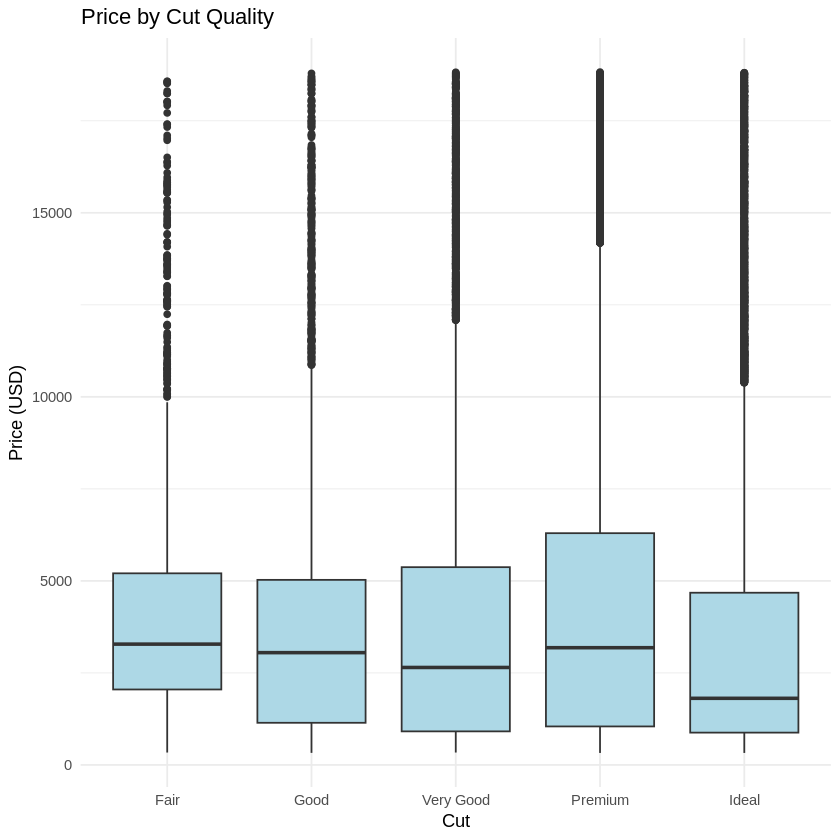

In [ ]:
ggplot(diamonds, aes(x = cut, y = price)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Price by Cut Quality", x = "Cut", y = "Price (USD)") +
  theme_minimal()

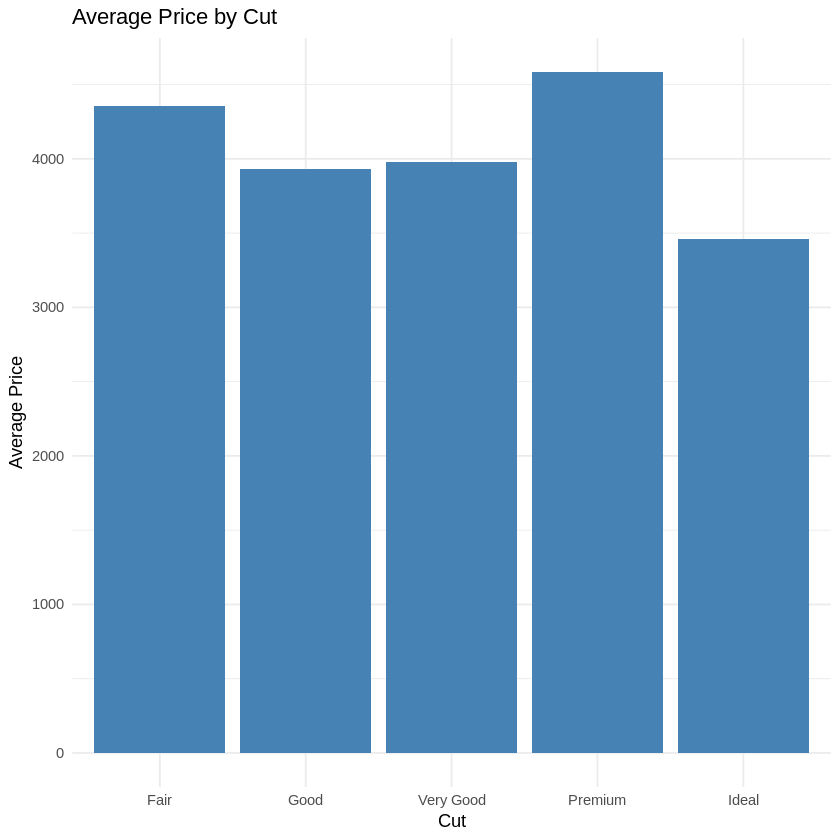

In [ ]:
# Summarize the data
average_prices <- diamonds %>%
  group_by(cut) %>%
  summarize(avg_price = mean(price)) %>%
  arrange(desc(avg_price))

# Plot the summarized data
ggplot(average_prices, aes(x = cut, y = avg_price)) +
  geom_col(fill = "steelblue") +
  labs(title = "Average Price by Cut", x = "Cut", y = "Average Price") +
  theme_minimal()



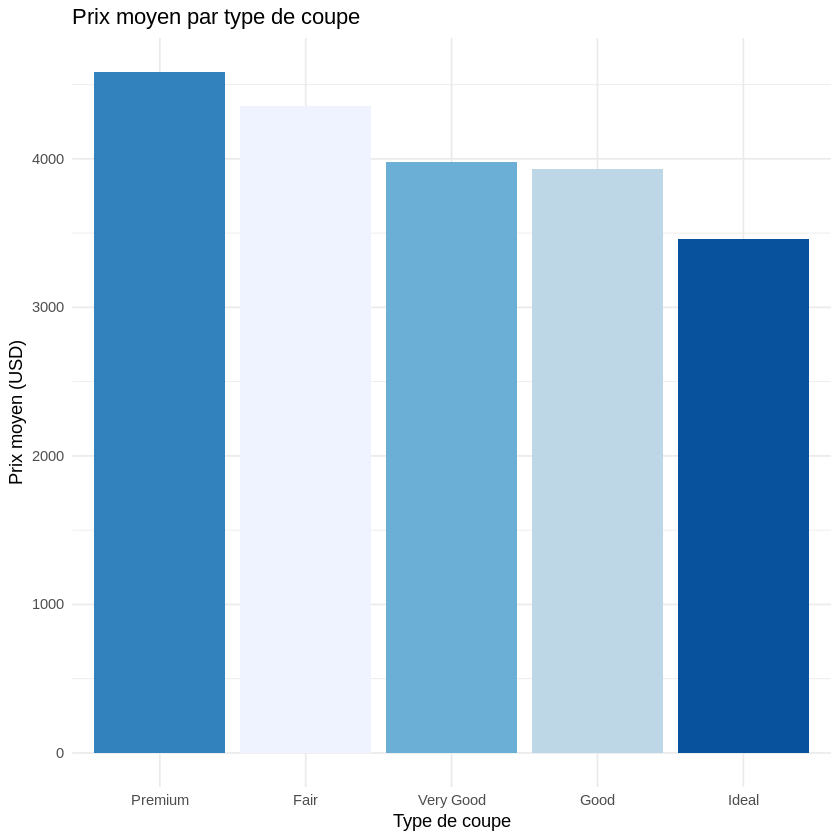

In [ ]:
# Calcul des prix moyens par type de coupe
avg_price_data <- diamonds %>%
  group_by(cut) %>%
  summarize(avg_price = mean(price)) %>%
  arrange(desc(avg_price))

# Graphique
ggplot(avg_price_data, aes(x = reorder(cut, -avg_price), y = avg_price, fill = cut)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(
    title = "Prix moyen par type de coupe",
    x = "Type de coupe",
    y = "Prix moyen (USD)"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Blues")

Warning message:
“Unknown palette: "Purles"”


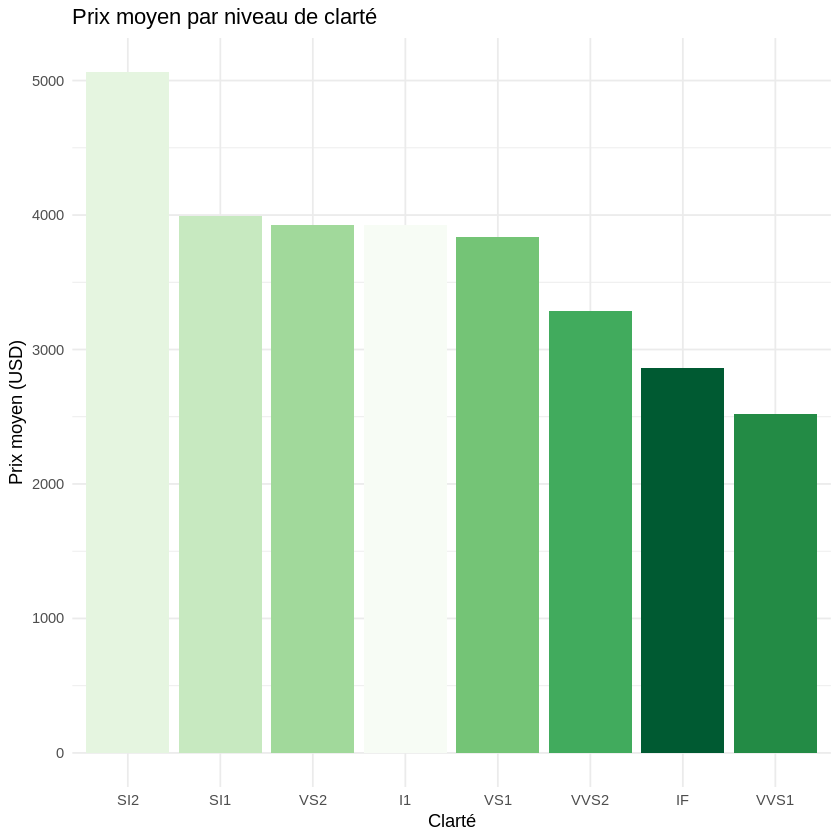

In [ ]:
# Calcul des prix moyens par niveau de clarté
avg_price_clarity <- diamonds %>%
  group_by(clarity) %>%
  summarize(avg_price = mean(price)) %>%
  arrange(desc(avg_price))

# Graphique pour la clarté
ggplot(avg_price_clarity, aes(x = reorder(clarity, -avg_price), y = avg_price, fill = clarity)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(
    title = "Prix moyen par niveau de clarté",
    x = "Clarté",
    y = "Prix moyen (USD)"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Purles")


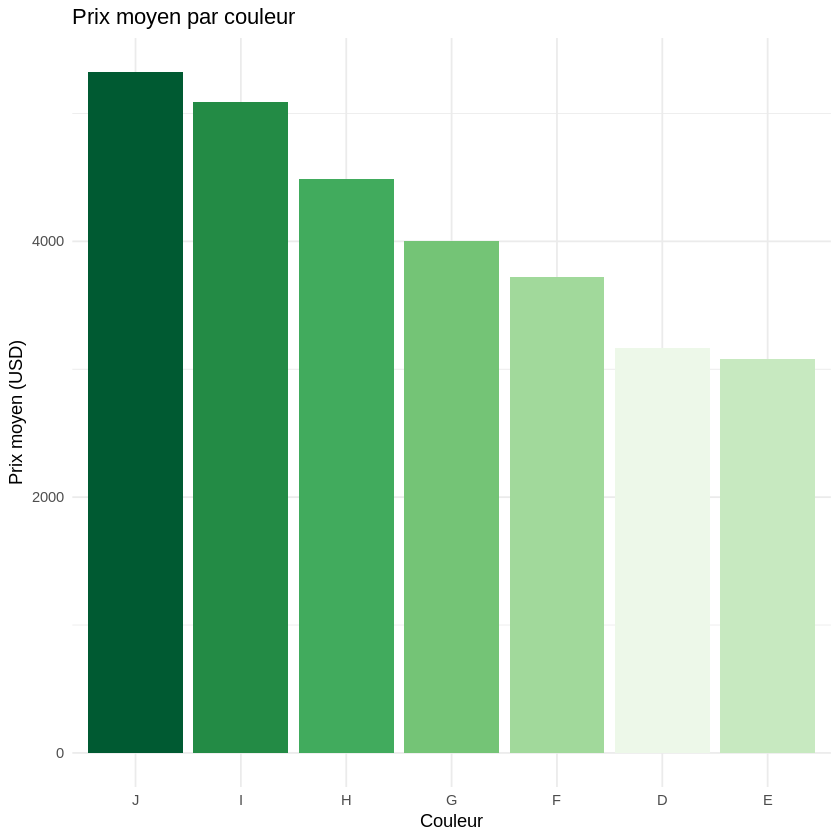

In [ ]:
# Calcul des prix moyens par couleur
avg_price_color <- diamonds %>%
  group_by(color) %>%
  summarize(avg_price = mean(price)) %>%
  arrange(desc(avg_price))

# Graphique pour la couleur
ggplot(avg_price_color, aes(x = reorder(color, -avg_price), y = avg_price, fill = color)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(
    title = "Prix moyen par couleur",
    x = "Couleur",
    y = "Prix moyen (USD)"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Greens")


In [ ]:
# Check average carat by category
diamonds %>%
  group_by(cut) %>%
  summarize(avg_carat = mean(carat), avg_price = mean(price))


diamonds %>%
  group_by(clarity) %>%
  summarize(avg_carat = mean(carat), avg_price = mean(price))


diamonds %>%
  group_by(color) %>%
  summarize(avg_carat = mean(carat), avg_price = mean(price))



cut,avg_carat,avg_price
<ord>,<dbl>,<dbl>
Fair,1.0461366,4358.758
Good,0.8491847,3928.864
Very Good,0.8063814,3981.760
Premium,0.8919549,4584.258
Ideal,0.7028370,3457.542


clarity,avg_carat,avg_price
<ord>,<dbl>,<dbl>
I1,1.2838462,3924.169
SI2,1.0776485,5063.029
SI1,0.8504822,3996.001
VS2,0.7639346,3924.989
VS1,0.7271582,3839.455
VVS2,0.5962021,3283.737
VVS1,0.5033215,2523.115
IF,0.5051229,2864.839


color,avg_carat,avg_price
<ord>,<dbl>,<dbl>
D,0.6577948,3169.954
E,0.6578667,3076.752
F,0.7365385,3724.886
G,0.7711902,3999.136
H,0.9117991,4486.669
I,1.0269273,5091.875
J,1.1621368,5323.818


In [ ]:
cor(diamonds$price, diamonds$carat)


[1] 0.9215913

In [ ]:
diamonds %>%
  group_by(cut, color) %>%
  summarize(avg_price = mean(price), .groups = "drop") %>%
  arrange(desc(avg_price))


cut,color,avg_price
<ord>,<ord>,<dbl>
Premium,J,6294.592
Premium,I,5946.181
Very Good,I,5255.880
Premium,H,5216.707
Fair,H,5135.683
Very Good,J,5103.513
Good,I,5078.533
Fair,J,4975.655
Ideal,J,4918.186


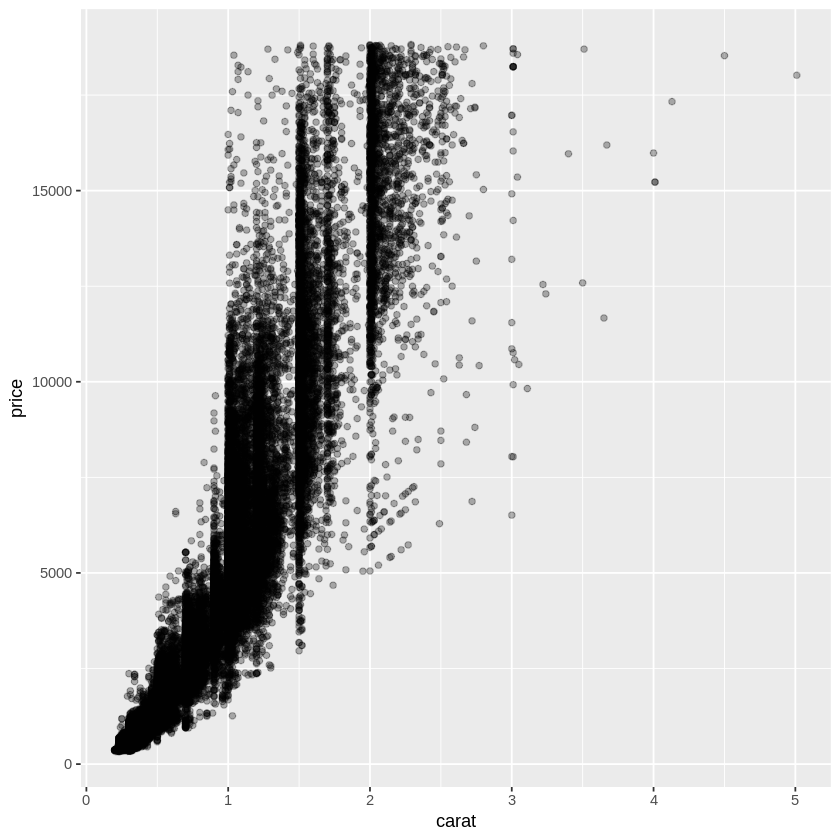

In [ ]:
ggplot(diamonds, aes(x = carat, y = price)) + geom_point(alpha = 0.3)


# Testing PCA

Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     2.1998 1.1337 0.83137 0.4030 0.14043 0.03628 0.03531
Proportion of Variance 0.6913 0.1836 0.09874 0.0232 0.00282 0.00019 0.00018
Cumulative Proportion  0.6913 0.8749 0.97362 0.9968 0.99963 0.99982 1.00000

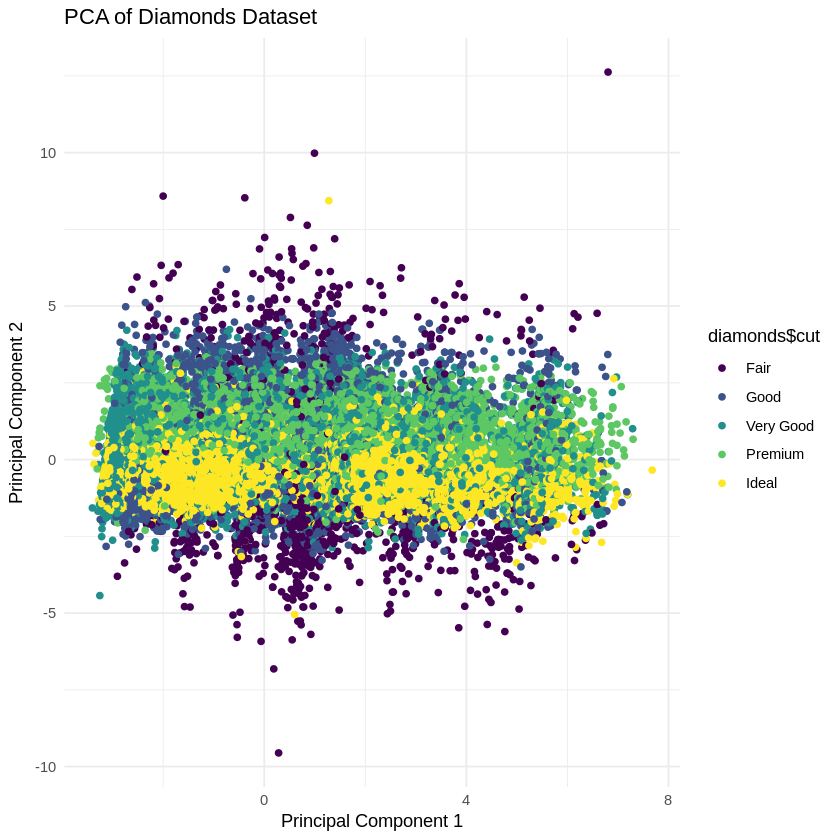

In [ ]:
# Prepare the data (select numeric columns)
numeric_data <- diamonds %>%
  select(carat, depth, table, price, x, y, z)

# Standardize the data
scaled_data <- scale(numeric_data)

# Perform PCA
pca_result <- prcomp(scaled_data, center = TRUE, scale. = TRUE)

# Summary of PCA to see the explained variance
summary(pca_result)

# Visualize the first two principal components
library(ggplot2)
pca_df <- as.data.frame(pca_result$x)
ggplot(pca_df, aes(x = PC1, y = PC2)) +
  geom_point(aes(color = diamonds$cut)) +
  theme_minimal() +
  labs(title = "PCA of Diamonds Dataset", x = "Principal Component 1", y = "Principal Component 2")


In [ ]:
diamonds %>%
  group_by(cut) %>%
  summarize(avg_price = mean(price)) %>%
  arrange(desc(avg_price))


cut,avg_price
<ord>,<dbl>
Premium,4568.478
Fair,4272.488
Very Good,3979.686
Good,3912.342
Ideal,3455.439


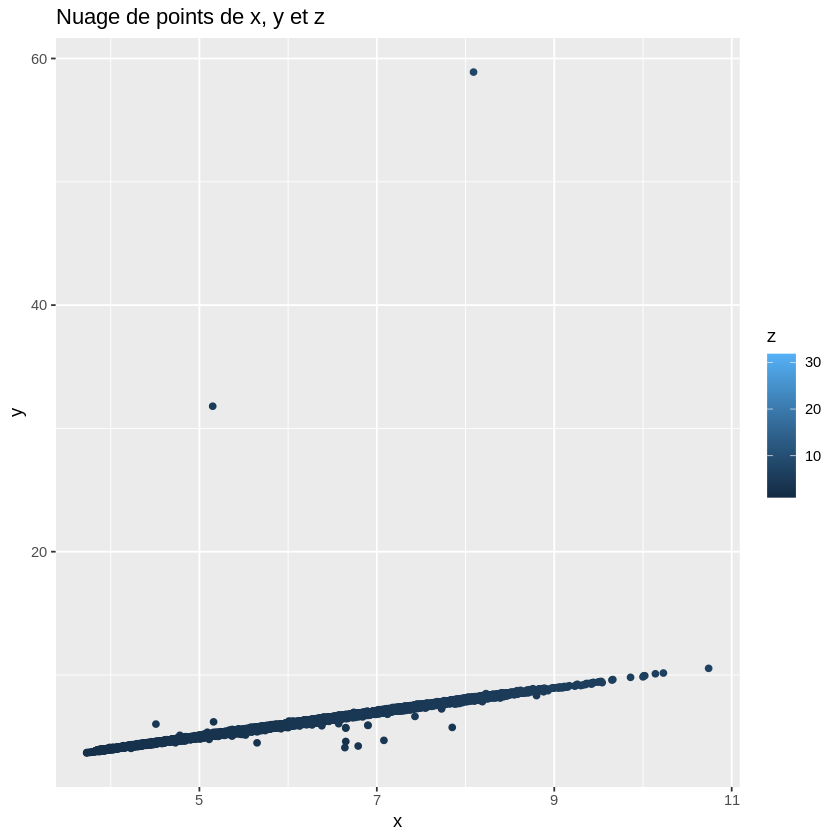

In [ ]:
# Nuage de points pour x, y, et z
ggplot(diamonds, aes(x = x, y = y, color = z)) +
  geom_point() +
  labs(title = "Nuage de points de x, y et z")

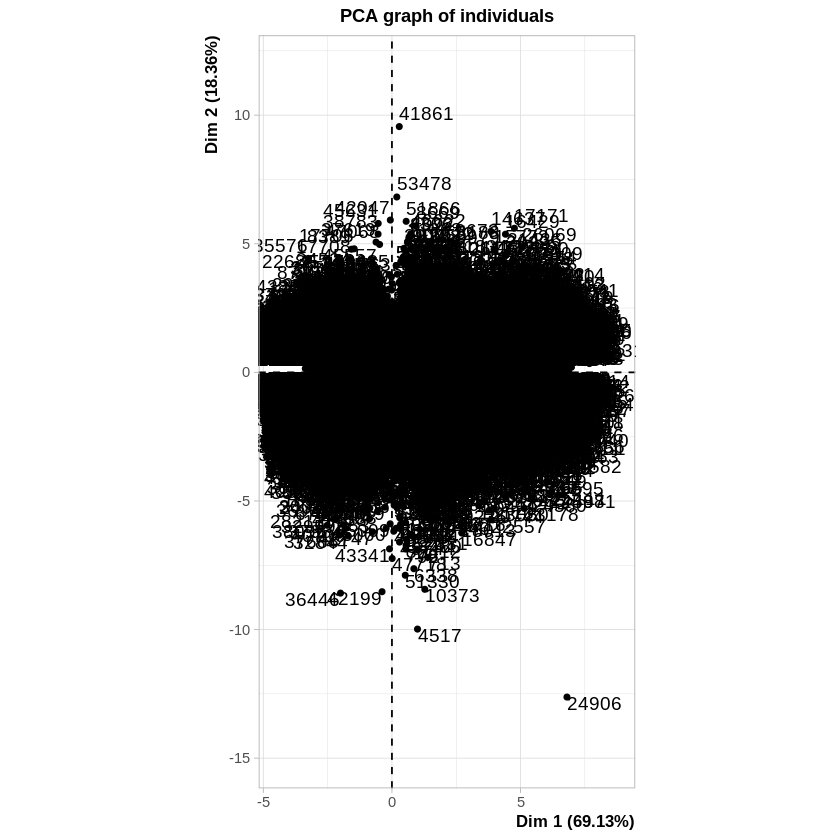

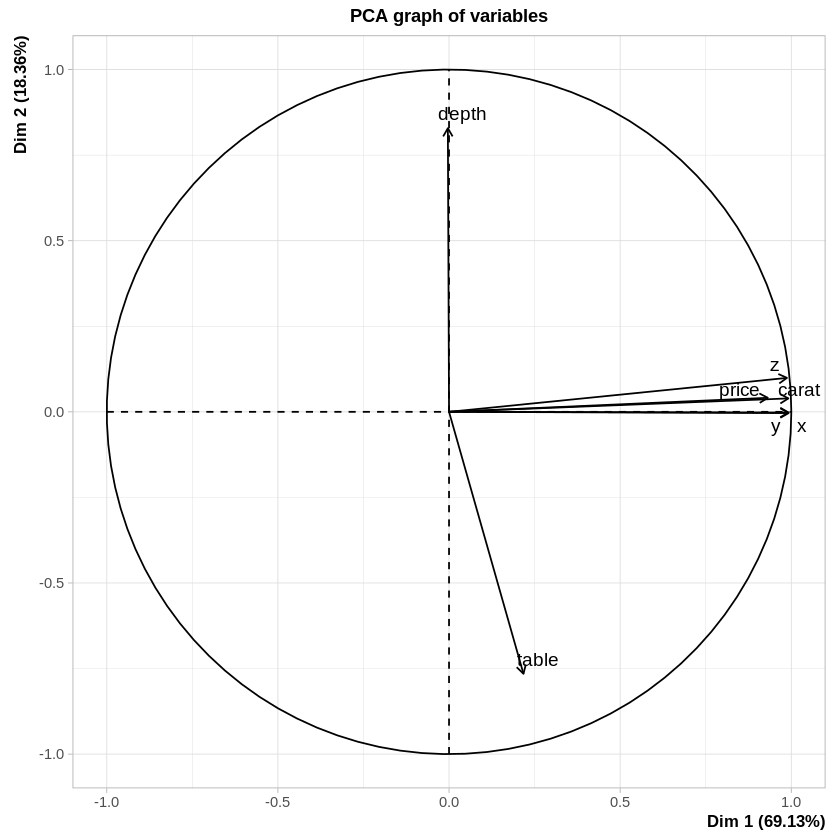

In [ ]:
# Plot the individuals (data points) in the PCA space
plot.PCA(pca_result, choix = "ind", main = "PCA of Diamonds Dataset (Individuals)")

# Plot the variables (features) in the PCA space
plot.PCA(pca_result, choix = "var", main = "PCA of Diamonds Dataset (Variables)")

In [ ]:
# Préparer les données en excluant x, y, et z
numeric_data <- diamonds %>%
  select(carat, depth, table, price)

# Réaliser l'ACP
pca_result2 <- PCA(numeric_data, scale.unit = TRUE, graph = TRUE)


Warning message:
“Using shapes for an ordinal variable is not advised”


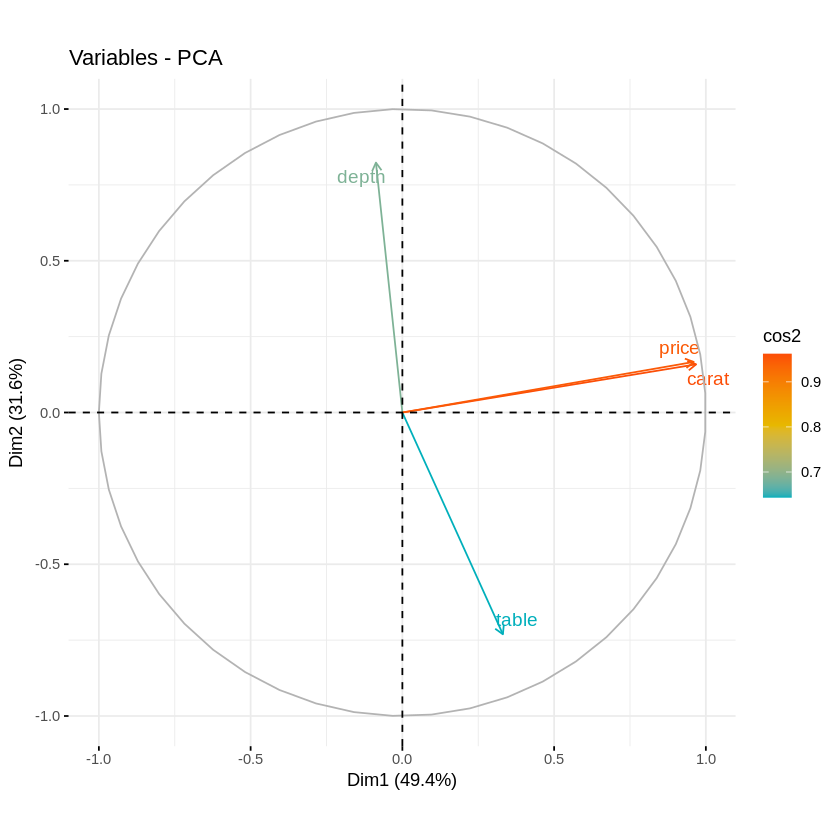

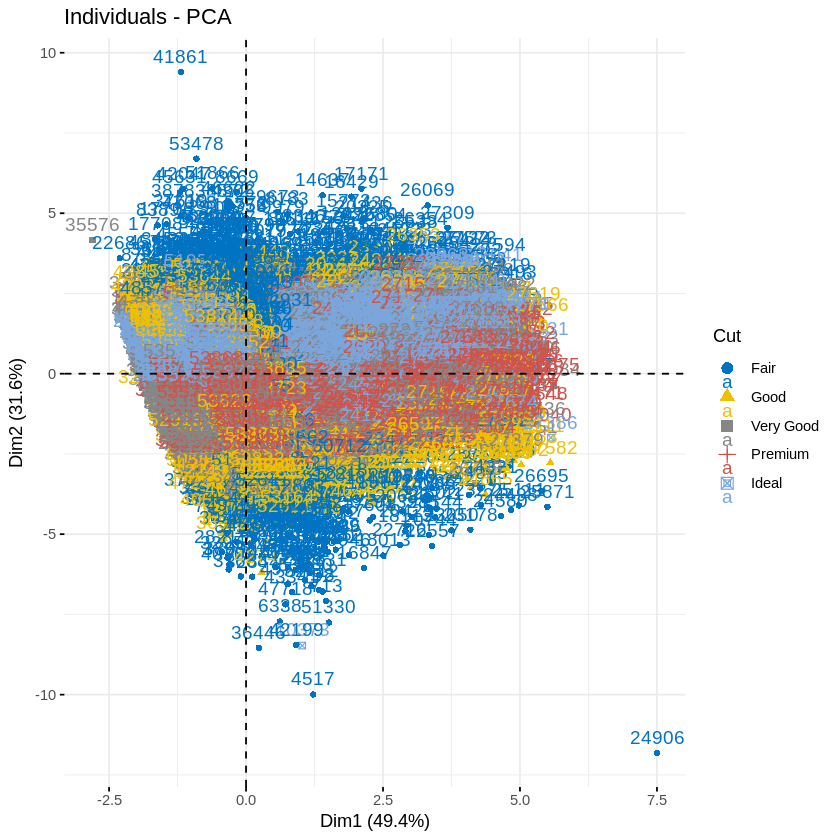

In [ ]:
# Visualiser les variables dans l'espace des composantes principales
fviz_pca_var(pca_result2, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

# Visualiser les individus dans l'espace des composantes principales
fviz_pca_ind(pca_result2, col.ind = diamonds$cut,
             palette = "jco",
             addEllipses = FALSE,
             legend.title = "Cut")

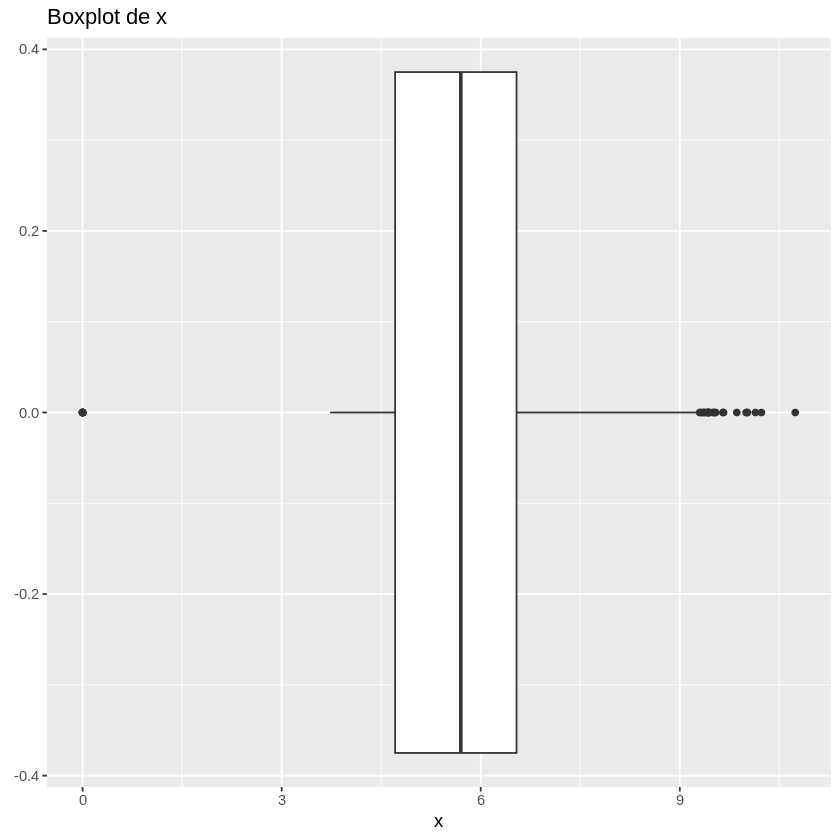

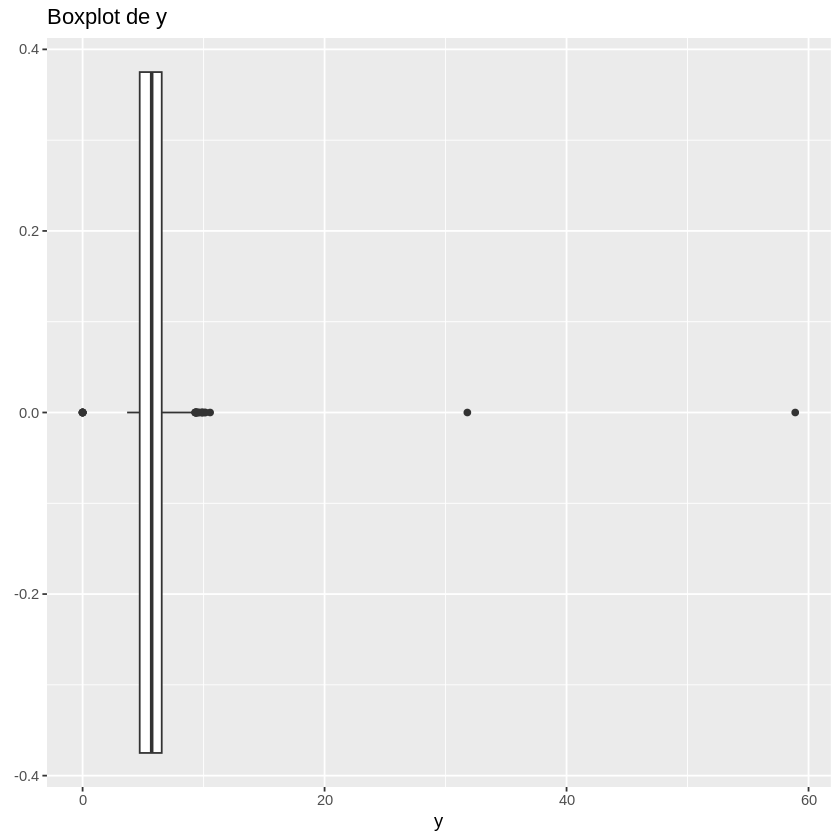

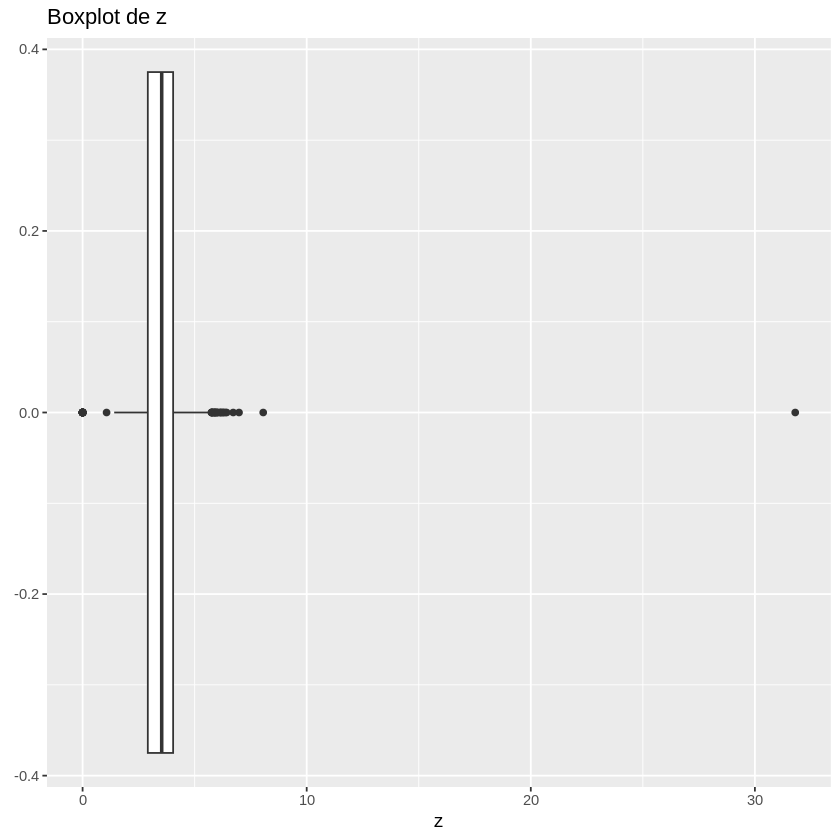

In [ ]:
# Boxplot pour la variable 'x'
ggplot(diamonds, aes(x = x)) +
  geom_boxplot() +
  labs(title = "Boxplot de x")

# Boxplot pour la variable 'y'
ggplot(diamonds, aes(x = y)) +
  geom_boxplot() +
  labs(title = "Boxplot de y")

# Boxplot pour la variable 'z'
ggplot(diamonds, aes(x = z)) +
  geom_boxplot() +
  labs(title = "Boxplot de z")


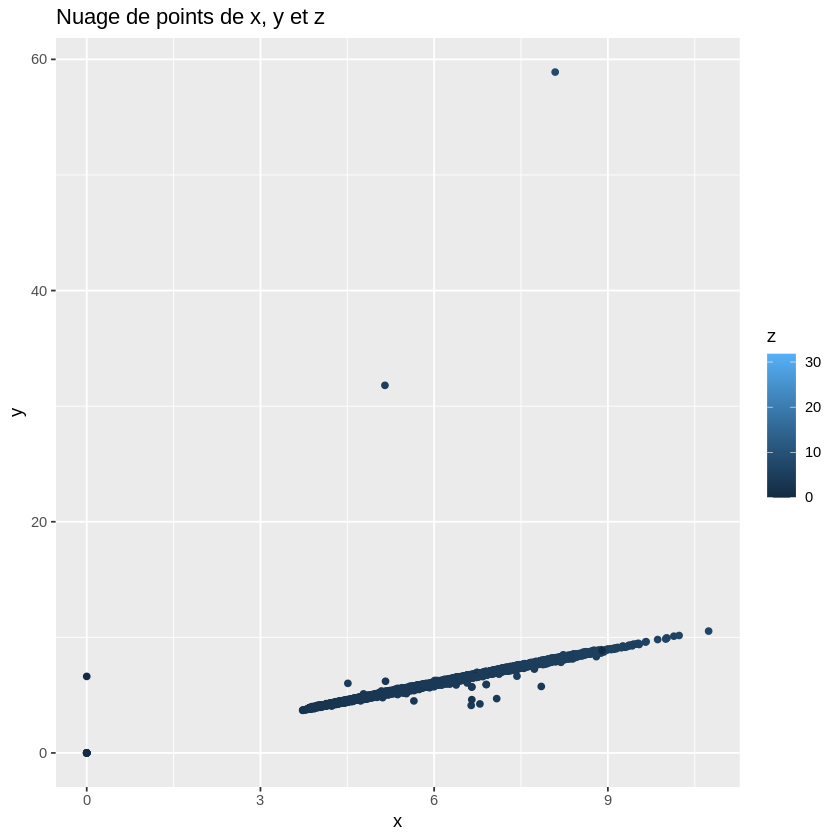

In [ ]:
# Nuage de points pour x, y, et z
ggplot(diamonds, aes(x = x, y = y, color = z)) +
  geom_point() +
  labs(title = "Nuage de points de x, y et z")


In [ ]:
cor(diamonds$price, diamonds$carat)

[1] 0.9215921

In [ ]:
# Matrice de corrélation entre les variables numériques
cor_matrix <- cor(diamonds %>% select(carat, depth, table, x, y, z, price))
print(cor_matrix)


           carat       depth      table           x           y          z
carat 1.00000000  0.02537336  0.1817420  0.97903608  0.97819114 0.97769555
depth 0.02537336  1.00000000 -0.2956416 -0.02684902 -0.02997003 0.09478324
table 0.18174197 -0.29564159  1.0000000  0.19576207  0.18958200 0.15564272
x     0.97903608 -0.02684902  0.1957621  1.00000000  0.99864868 0.99127236
y     0.97819114 -0.02997003  0.1895820  0.99864868  1.00000000 0.99093380
z     0.97769555  0.09478324  0.1556427  0.99127236  0.99093380 1.00000000
price 0.92338139 -0.01211336  0.1265591  0.88683753  0.88843443 0.88189847
            price
carat  0.92338139
depth -0.01211336
table  0.12655907
x      0.88683753
y      0.88843443
z      0.88189847
price  1.00000000


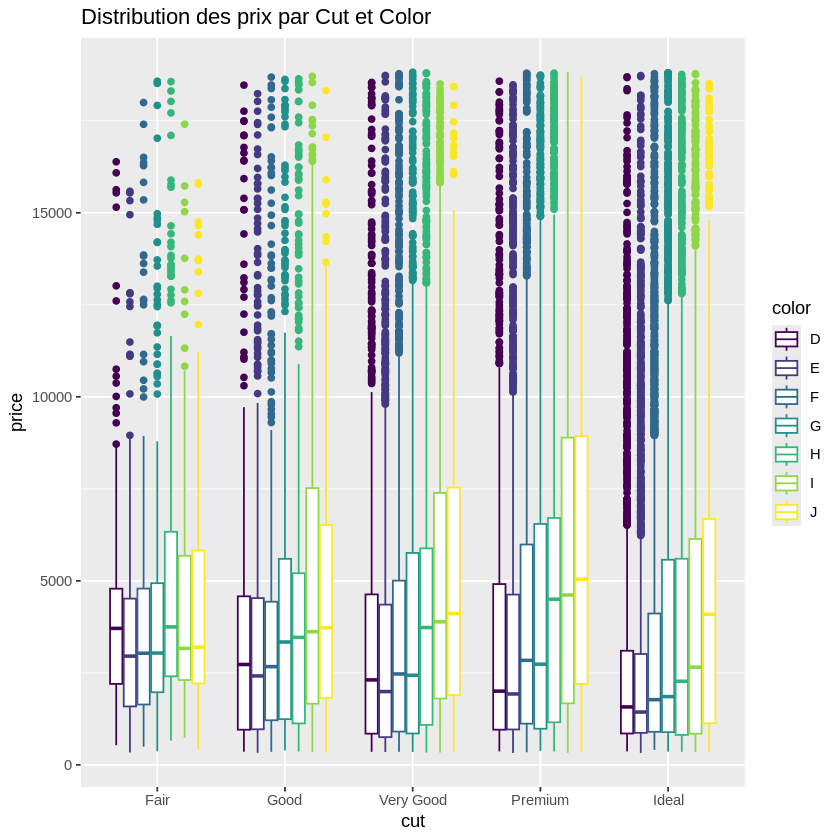

In [ ]:
ggplot(diamonds, aes(x = cut, y = price, color = color)) +
  geom_boxplot() +
  labs(title = "Distribution des prix par Cut et Color")
